In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [62]:
df=pd.read_csv("wtvsht.csv")

In [63]:
df.head()

,Weight,Height
0,63,174
1,55,168
2,58,176
3,63,185
4,53,167


Text(0, 0.5, 'Height')

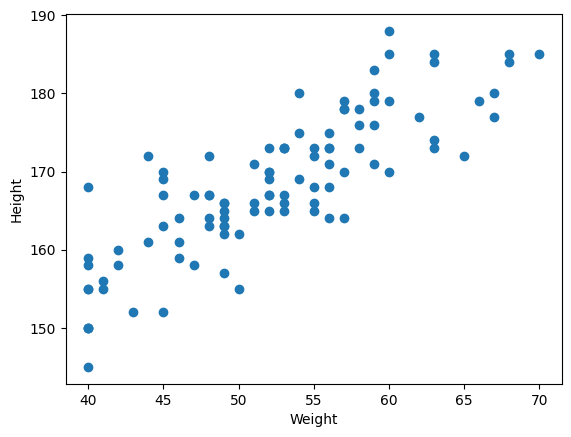

In [64]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [65]:
df.corr()

,Weight,Height
Weight,1.00000,0.83274
Height,0.83274,1.00000


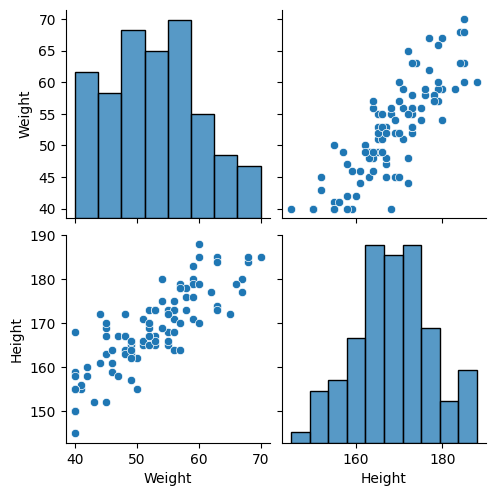

In [66]:
## seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [67]:
## independednt and dependent features
X=df[["Weight"]] ##extra bracket for data fraome we want our independent feature to be data frame or 2d array
y=df['Height'] ##this variable can be in series or 1d array


In [68]:
## independednt and dependent features
X_s=df[["Weight"]] ##extra bracket for data fraome we want our independent feature to be data frame or 2d array
np.array(X_s).shape

(100, 1)

In [69]:
!pip install scikit-learn

In [70]:
## Train Test split
from sklearn.model_selection import train_test_split


In [71]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [72]:
## Standardisation
# we take each independent feature and calculate z score - mean =0 sd=1 
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) ## for training data

In [74]:
X_test=scaler.transform(X_test) ##basically we are using this to set stddev=1 and mean =0 for testing data as we dont want any correlation b/w this and training

In [75]:
X_test

array([[ 0.59638084],
       [ 0.85567685],
       [ 0.33708482],
       [-0.31115522],
       [-1.6076353 ],
       [ 0.85567685],
       [-0.0518592 ],
       [-0.57045124],
       [ 0.33708482],
       [ 1.37426889],
       [-1.34833928],
       [-0.95939526],
       [ 0.98532486],
       [-0.82974725],
       [-0.0518592 ],
       [ 0.0777888 ],
       [-0.95939526],
       [-0.57045124],
       [ 1.6335649 ],
       [ 0.98532486],
       [ 0.59638084],
       [-0.82974725],
       [-1.34833928],
       [ 0.46673283],
       [-0.57045124]])

In [76]:
##Apply linear regresstion
from sklearn.linear_model import LinearRegression


In [77]:
regression = LinearRegression(n_jobs=-1)

In [78]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [79]:
regression.coef_ ##slope beta1

array([8.01639564])

In [80]:
regression.intercept_  ##intercept beta0

np.float64(168.45333333333335)

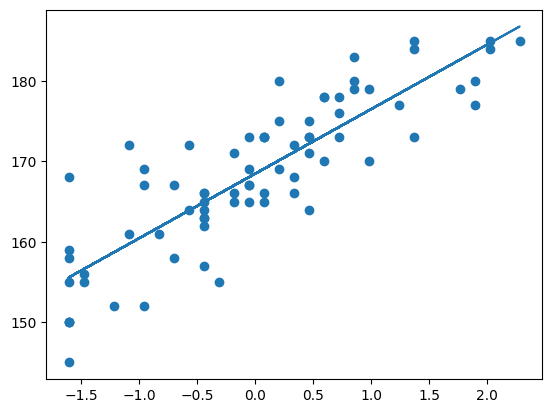

In [81]:
## plot training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) ## we predicted for training data just to see the line

### Prediction 
1. height = intercept_ + coef_(Weights)
2. y_pred_test=113.99 + 1.039(X_test)

In [82]:
##Prediction for test data

y_pred=regression.predict(X_test)

In [83]:
## performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


27.399149765581466
4.173665262214249
5.234419716222751


## Rsquare
R^2 = 1-SSR/SST
R^2 = coeff of determination SSR = sum of residuals SST = total sum of squares

In [84]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.5469717300664441

## Adjusted R^2 = 1- [(1-R^2)*(n-1)/(n-k-1)]
* n - no of observations
* k - no of prdictor variables

In [85]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5272748487649851

In [86]:
!pip install statsmodels

In [87]:
##OLS Linear Regression
import statsmodels.api as sm

In [88]:
model = sm.OLS(y_train,X_train).fit()

In [89]:
prediction=model.predict(X_test)

In [90]:
prediction

array([  4.78082474,   6.8594442 ,   2.70220529,  -2.49434334,
       -12.88744061,   6.8594442 ,  -0.41572389,  -4.5729628 ,
         2.70220529,  11.0166831 , -10.80882116,  -7.69089198,
         7.89875392,  -6.65158225,  -0.41572389,   0.62358584,
        -7.69089198,  -4.5729628 ,  13.09530255,   7.89875392,
         4.78082474,  -6.65158225, -10.80882116,   3.74151502,
        -4.5729628 ])

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.011
Method:                 Least Squares   F-statistic:                             0.1674
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                       0.684
Time:                        22:10:45   Log-Likelihood:                         -490.95
No. Observations:                  75   AIC:                                      983.9
Df Residuals:                      74   BIC:                                      986.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.0164     19.591      0.409      0.684     -31.019      47.052
==============================================================================
Omnibus:                        0.414   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.328
Skew:                           0.158   Prob(JB):                        0.849
Kurtosis:                       2.932   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
##Prediction for new data
regression.predict(scaler.transform([[72]]))#we need to first transform it - scale it down coz we did it during training data

d:\Learning\MLCourse\python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([188.82380397])